In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [6]:
import pandas as pd

# Load the training data
train_df = pd.read_csv('train.csv')

# Load the test data
test_df = pd.read_csv('test.csv')

# View the first few rows of the training data
print(train_df.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [7]:
# Load the training and test datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Drop rows with missing target values (SalePrice) in the training set
train_df.dropna(subset=['SalePrice'], inplace=True)

# Define the features (X) and the target variable (y)
X_train = train_df.drop(['SalePrice', 'Id'], axis=1)
y_train = train_df['SalePrice']
X_test = test_df.drop(['Id'], axis=1)

# Separate numeric and categorical columns
numeric_cols = X_train.select_dtypes(include=[np.number]).columns
categorical_cols = X_train.select_dtypes(exclude=[np.number]).columns
       
# Handle missing values
# For numeric columns, use median imputation
numeric_imputer = SimpleImputer(strategy='median')
X_train_numeric = pd.DataFrame(numeric_imputer.fit_transform(X_train[numeric_cols]), columns=numeric_cols)
X_test_numeric = pd.DataFrame(numeric_imputer.transform(X_test[numeric_cols]), columns=numeric_cols)

# For categorical columns, use most frequent imputation
categorical_imputer = SimpleImputer(strategy='most_frequent')
X_train_categorical = pd.DataFrame(categorical_imputer.fit_transform(X_train[categorical_cols]), columns=categorical_cols)
X_test_categorical = pd.DataFrame(categorical_imputer.transform(X_test[categorical_cols]), columns=categorical_cols)

# Combine numeric and categorical data back together
X_train = pd.concat([X_train_numeric, X_train_categorical], axis=1)
X_test = pd.concat([X_test_numeric, X_test_categorical], axis=1)

# One-hot encoding for categorical variables
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Align training and test data to ensure they have the same columns
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

In [11]:
# 3. Make predictions on the training data
y_train_pred = model.predict(X_train)

In [2]:
# 2. Model Training: Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
mse = mean_squared_error(y_train, y_train_pred)
r2 = r2_score(y_train, y_train_pred)
print(f'Mean Squared Error on Training Set: {mse}')
print(f'R² Score on Training Set: {r2}')

NameError: name 'LinearRegression' is not defined

In [13]:
# 4. Predict on the Test Set
test_pred = model.predict(X_test)

# Create the submission dataframe
submission_df = pd.DataFrame({'Id': test_df['Id'], 'SalePrice': test_pred})

# Save the predictions to a CSV file
submission_df.to_csv('house_price_predictions.csv', index=False)

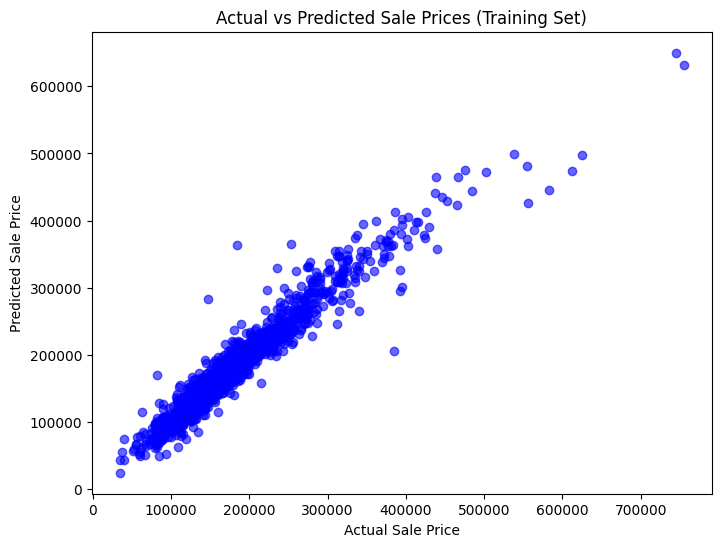

In [14]:
# 5. Visualization and Plotting
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, alpha=0.6, color='b')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted Sale Prices (Training Set)')
plt.show()

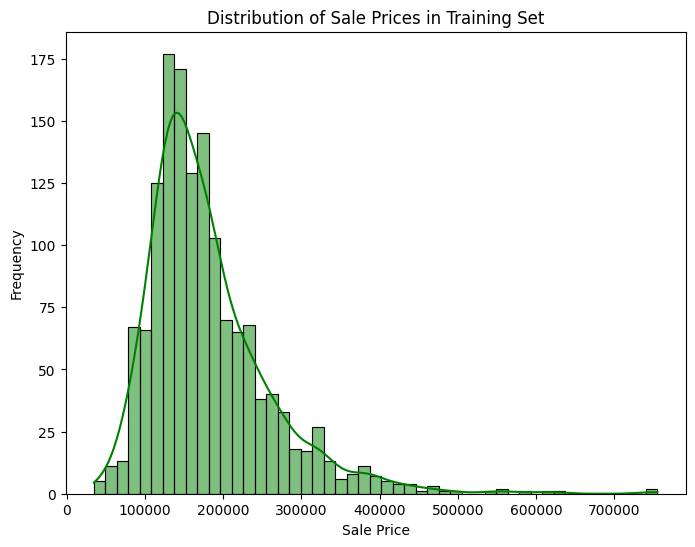

In [15]:
# Plot distribution of Sale Prices in training set
plt.figure(figsize=(8, 6))
sns.histplot(y_train, kde=True, color='green')
plt.title('Distribution of Sale Prices in Training Set')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

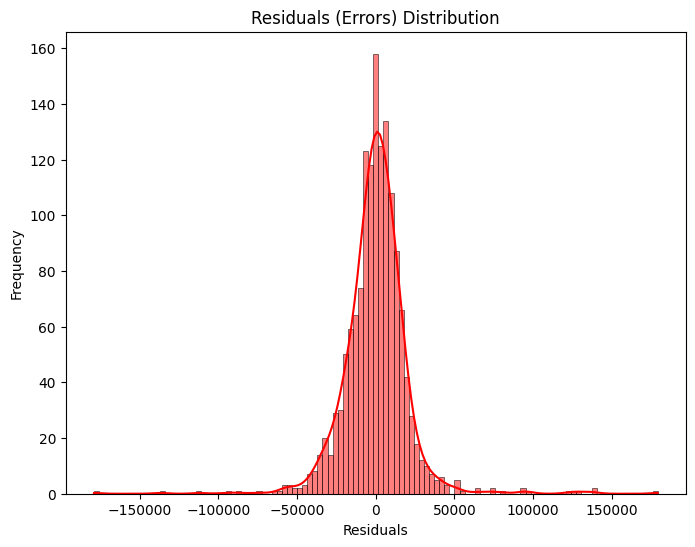

In [16]:
# Plot residuals (errors) for training set predictions
residuals = y_train - y_train_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='red')
plt.title('Residuals (Errors) Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()